<a href="https://colab.research.google.com/github/sabaagizew/abtest-mlops/blob/main/AB_Test_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Loading useful packages
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import scipy
from scipy import stats

from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
pd.set_option('max_column', None)
df= pd.read_csv('drive/MyDrive/AdSmartABdata.csv')

In [5]:
df.head(5)


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [9]:
df.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [ ]:
#Task 2.2: ML modelling with MLOps


In [17]:
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')



from keras import Sequential
from keras import optimizers
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential,Model
from keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization,CuDNNLSTM, GRU, CuDNNGRU, Embedding, GlobalMaxPooling1D, GlobalAveragePooling1D, Flatten
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints
from sklearn.model_selection import KFold, cross_val_score, train_test_split

train = pd.read_csv('drive/MyDrive/AdSmartABdata.csv')
display(train.shape)

train.head()

(8077, 9)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [18]:
y= train.head().platform_os

In [19]:
x=train.head().drop('browser',axis=1)


In [20]:
x.head()

,auction_id,experiment,date,hour,device_make,platform_os,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,0,0


In [21]:
y.head()

0    6
1    6
2    6
3    6
4    6
Name: platform_os, dtype: int64

In [22]:
#train_test_split

In [23]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
print("shape of original dataset :", train.head().shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)


shape of original dataset : (5, 9)
shape of input - training set (4, 8)
shape of output - training set (4,)
shape of input - testing set (1, 8)
shape of output - testing set (1,)


In [13]:
import datetime
df['date']=pd.to_datetime(df['date'])
df['day']=pd.Series(df['date'].dt.day_name())

#drop rows where both columns yes and no are 0
drop_rows=df[(df['yes']==0) & (df['no']==0)].index
df.drop(drop_rows,inplace=True)

#drop columns auction_id, no because that information is on column yes
df=df.drop(['auction_id','no','date'],axis=1)

In [14]:
browser=df.drop(['platform_os'],axis=1)
platform=df.drop(['browser'],axis=1)
#browser.reset_index()
#platform.reset_index()

In [24]:
#Label Encoding to convert text columns to numerical format
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

def label_en(df):
    columns=df.columns
    for i in columns:
        df[i]=le.fit_transform(df[i].astype(str))
        
label_en(browser)
label_en(platform)

In [25]:
def loss_function(y_test, y_preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    r_sq = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)

    print('Prediction RMSE Score: {}'.format(rmse))
    print('Prediction R2_Squared: {}'.format(r_sq))
    print('Prediction MAE Score: {}'.format(mae))

In [ ]:
#Train a machine learning model using 5-fold cross validation using Logistic Regression.


In [26]:
def log_model(X_train,X_test,y_train,y_test):
    kfold=KFold(n_splits=5,random_state=42,shuffle=True)
    model=LogisticRegression()
    #hyper-parameter tuning
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kfold, n_jobs=-1)
    print('Validation Accuracy: %.3f (%.3f)' %(np.mean(scores), np.std(scores)))
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    loss_function(y_test, y_pred)
    
    #get feature importance
    importance = model.coef_[0]
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))

    # plot feature importance
    sns.barplot([x for x in range(len(importance))], importance,palette='summer')
    plt.title('Logistic Regression Feature Importance')
    plt.show()

In [27]:
#Decision Trees
# It is effective in classifying complex datasets.

In [28]:
def decision_trees(X_train,X_test,y_train,y_test):
    kfold=KFold(n_splits=5,random_state=42,shuffle=True)
    dtree=DecisionTreeClassifier()
    #hyper-parameter tuning
    scores = cross_val_score(dtree, X_train, y_train, scoring='accuracy', cv=kfold, n_jobs=-1)
    print('Validation Accuracy: %.3f (%.3f)' %(np.mean(scores), np.std(scores)))
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    loss_function(y_test, y_pred)
    
    importance = dtree.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))

    # plot feature importance
    sns.barplot([x for x in range(len(importance))], importance,palette='summer')
    plt.title('Decision Tree Classifier Feature Importance')
    plt.show()

In [ ]:
#XGBoost
#It merge several weak learning models together to produce a strong predictive model

In [29]:
def xgboost_model(X_train,X_test,y_train,y_test):
    kfold=KFold(n_splits=5,random_state=42,shuffle=True)
    model=XGBClassifier()
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kfold, n_jobs=-1)
    print('Validation Accuracy: %.3f (%.3f)' %(np.mean(scores), np.std(scores)))
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    loss_function(y_test, y_pred)
    
    # Fit model using each importance as a threshold
    thresholds = np.sort(model.feature_importances_)
    for thresh in thresholds:
        # select features using threshold
        selection = SelectFromModel(model, threshold=thresh, prefit=True)
        select_X_train = selection.transform(X_train)
        # train model
        selection_model = XGBClassifier(verbosity=0)
        selection_model.fit(select_X_train, y_train)
        # eval model
        select_X_test = selection.transform(X_test)
        y_pred = selection_model.predict(select_X_test)
        predictions = [round(value) for value in y_pred]
        accuracy = accuracy_score(y_test, predictions)
        print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
        
    plot_importance(model,color='#B0C485')
    plt.show()

In [30]:
df=browser

X=df.loc[:,df.columns != 'yes']
y=df['yes']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=42) 

Validation Accuracy: 0.534 (0.046)
Prediction RMSE Score: 0.6810337513731485
Prediction R2_Squared: -0.8665104709013074
Prediction MAE Score: 0.46380697050938335
Feature: 0, Score: 0.11084
Feature: 1, Score: 0.00916
Feature: 2, Score: 0.00252
Feature: 3, Score: -0.04485
Feature: 4, Score: 0.00588


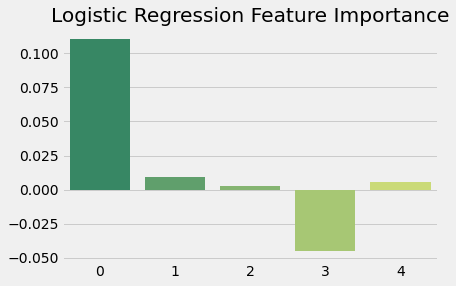

In [31]:
browser_log=log_model(X_train, X_test, y_train, y_test)
browser_log

Validation Accuracy: 0.503 (0.045)
Prediction RMSE Score: 0.6829992208317931
Prediction R2_Squared: -0.877299548767789
Prediction MAE Score: 0.46648793565683644
Feature: 0, Score: 0.09665
Feature: 1, Score: 0.21454
Feature: 2, Score: 0.30440
Feature: 3, Score: 0.09753
Feature: 4, Score: 0.28688


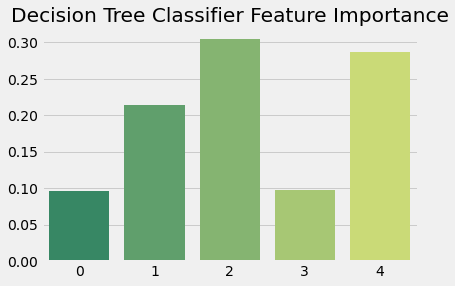

In [32]:
browser_tree=decision_trees(X_train, X_test, y_train, y_test)
browser_tree

Validation Accuracy: 0.499 (0.031)
Prediction RMSE Score: 0.6849590504579741
Prediction R2_Squared: -0.8880886266342705
Prediction MAE Score: 0.4691689008042895
Thresh=0.167, n=5, Accuracy: 53.08%
Thresh=0.180, n=4, Accuracy: 54.16%
Thresh=0.182, n=3, Accuracy: 52.01%
Thresh=0.193, n=2, Accuracy: 53.35%
Thresh=0.278, n=1, Accuracy: 54.16%


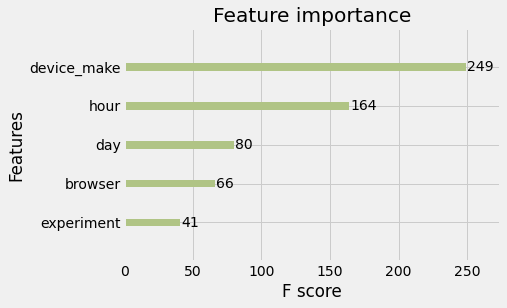

In [33]:
browser_xbg=xgboost_model(X_train, X_test, y_train, y_test)

In [ ]:
Browser data, top 3 features per model

Logistic Regression: browser_Chrome','browser_Chrome Mobile', 'browser_Chrome Mobile WebView' 4,5,6 | 645
Decision Tree Classifier: hour,device_make,day
xgboost: device_make,hour,day

In [34]:
df=platform

X=df.loc[:,df.columns != 'yes']
y=df['yes']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=42)  

Validation Accuracy: 0.521 (0.045)
Prediction RMSE Score: 0.6751030107080135
Prediction R2_Squared: -0.8341432373018627
Prediction MAE Score: 0.45576407506702415
Feature: 0, Score: 0.12845
Feature: 1, Score: 0.00961
Feature: 2, Score: 0.00128
Feature: 3, Score: 0.63399
Feature: 4, Score: 0.00693


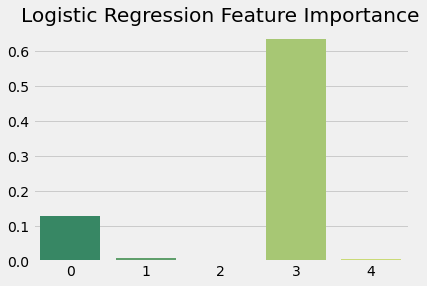

In [35]:
platform_log=log_model(X_train, X_test, y_train, y_test)
platform_log

Validation Accuracy: 0.490 (0.034)
Prediction RMSE Score: 0.690805179661132
Prediction R2_Squared: -0.9204558602337152
Prediction MAE Score: 0.4772117962466488
Feature: 0, Score: 0.09494
Feature: 1, Score: 0.23713
Feature: 2, Score: 0.34237
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.32557


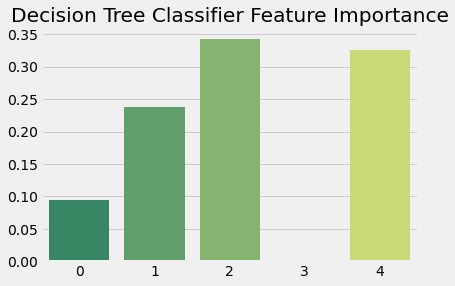

In [36]:
platform_tree=decision_trees(X_train, X_test, y_train, y_test)
platform_tree

Validation Accuracy: 0.500 (0.030)
Prediction RMSE Score: 0.6671133445503933
Prediction R2_Squared: -0.7909869258359365
Prediction MAE Score: 0.4450402144772118
Thresh=0.000, n=5, Accuracy: 55.50%
Thresh=0.231, n=4, Accuracy: 55.50%
Thresh=0.242, n=3, Accuracy: 52.01%
Thresh=0.262, n=2, Accuracy: 55.50%
Thresh=0.264, n=1, Accuracy: 49.60%


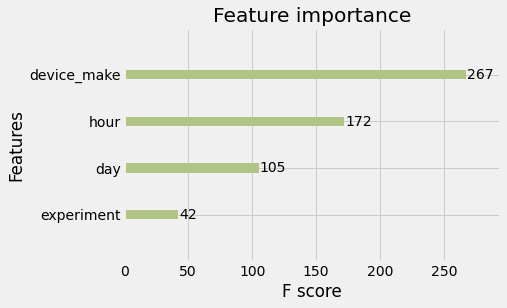

In [37]:
platform_xgb=xgboost_model(X_train, X_test, y_train, y_test)
platform_xgb

In [ ]:
####   END     ####